<a href="https://colab.research.google.com/github/TatyanaIvanushkina/Test_task-1/blob/main/test_MTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Задание_1
df = pd.read_excel('/content/Задания 1_3 для кандидата в ГУН.xlsx', sheet_name = 'Выгрузка')
df_1 = df.groupby(['МР сервис-провайдера','Тема', 'Подтема', 'Тип'], dropna = False).sum('Количество СЗ').loc[:,['Количество СЗ']].reset_index()
df_1_sum = df.groupby(['Тема', 'Подтема', 'Тип'], dropna = False).sum('Количество СЗ').loc[:,['Количество СЗ']].reset_index()
df_1_sum['МР сервис-провайдера'] = 'РФ'
df1 = pd.concat([df_1, df_1_sum], ignore_index = True)
df_1_new = pd.pivot_table(df1, index = ['Тема','Подтема'], columns = ['МР сервис-провайдера','Тип'], fill_value= 0).reset_index()
df_1_tot = df1.groupby(['МР сервис-провайдера', 'Тема', 'Тип'], dropna = False).sum('Количество СЗ').loc[:,['Количество СЗ']].reset_index()
df2 = df_1_tot.copy()
df_1_tot = pd.pivot_table(df_1_tot, index = ['Тема'], columns = ['МР сервис-провайдера','Тип'], fill_value= 0).reset_index()
df_1_tot['Подтема'] = df_1_tot['Тема'] + '_Всего'
df_1_res = pd.concat([df_1_new, df_1_tot],ignore_index = True)
df2 = df_1_res.copy()
df_1_res['ord'] = df_1_res['Подтема'].apply(lambda x: 1 if '_Всего' in x else 2)
df_1_res.sort_values(['Тема', 'ord'], ignore_index= True, inplace = True)
df_1_res.drop(['Тема', 'ord'], axis = 1, level = 0, inplace= True)
df_1_res.rename(columns = {'Подтема': 'Тема/Подтема'}, inplace = True)
df_1_res


Тема/Подтема  Количество СЗ         \
МР сервис-провайдера                                   00_02 МР Центр          
Тип                                                            Жалоба Заявка   
0                            Баланс и начисления_Всего              8     41   
1                                      Баланс абонента              0      0   
2                                          Компенсация              0     19   
3                      Корректировка без расчета суммы              0     20   
4                       Корректировка с расчетом суммы              0      2   
..                                                 ...            ...    ...   
162                                Описание технологии              0      0   
163                   Подключение/отключение доп услуг              0      0   
164                                Привязка MAC-адреса              0      7   
165                        Смена протокола авторизации              0      0   
166                                Частые обрывы связи             23      0   

                                                                             \
МР сервис-провайдера              00_03 МР Северо-Запад                       
Тип                  Консультация                Жалоба Заявка Консультация   
0                             338                     4      8           85   
1                             291                     0      0           62   
2                               0                     0      4            0   
3                               0                     0      2            0   
4                               0                     0      2            0   
..                            ...                   ...    ...          ...   
162                             4                     0      0            0   
163                             0                     0      0            0   
164                             0                     0     14            0   
165                             0                     0      0            0   
166                             0                    11      0            0   

                                                            ...                \
МР сервис-провайдера 00_04 МР Поволжье                      ... 00_06 МР Урал   
Тип                             Жалоба Заявка Консультация  ...  Консультация   
0                                    9     48          411  ...           189   
1                                    0      0          349  ...           171   
2                                    0     12            0  ...             0   
3                                    0     31            0  ...             0   
4                                    0      5            0  ...             0   
..                                 ...    ...          ...  ...           ...   
162                                  0      0            3  ...             1   
163                                  0      6            0  ...             0   
164                                  0      7            0  ...             0   
165                                  0      0            0  ...             0   
166                                 60      0            0  ...             0   

                                                                              \
МР сервис-провайдера 00_07 МР Дальний Восток                     00_09 МР Юг   
Тип                                   Жалоба Заявка Консультация      Жалоба   
0                                         12     33          139           4   
1                                          0      0           83           0   
2                                          0     11            0           0   
3                                          0     16            0           0   
4                                          0      6            0           0   
..                                     

In [ ]:
#Задание_2
filter = df1[df1['МР сервис-провайдера'] == 'РФ'].groupby(['МР сервис-провайдера','Тема'], dropna = False).sum('Количество СЗ').reset_index()\
.sort_values('Количество СЗ', ascending = False).head(5)['Тема'].to_list()
df['Среднее время'] = df[' Время разговора']/df['Количество СЗ']
df_time = df[df['Тема'].isin(filter)].groupby(['МР сервис-провайдера','Тема'], dropna = False).mean('Среднее время').round(2).loc[:,['Среднее время']].reset_index()
df_time_rf = df[df['Тема'].isin(filter)].groupby(['Тема']).mean('Среднее время').loc[:,['Среднее время']].reset_index().round(2)
df_time_rf['МР сервис-провайдера'] = 'РФ'
df_concat = pd.concat([df_time, df_time_rf], ignore_index=True)
df_task2 = pd.pivot_table(df_concat, index = ['Тема'], columns = ['МР сервис-провайдера'], fill_value = 0)
def color(x):
  if x>=250 and x<=300:
    return 'background-color: yellow'
  elif x>300:
    return 'background-color: pink'
df_task2_format = df_task2.style.applymap(color).format('{:.2f}')
df_task2_format

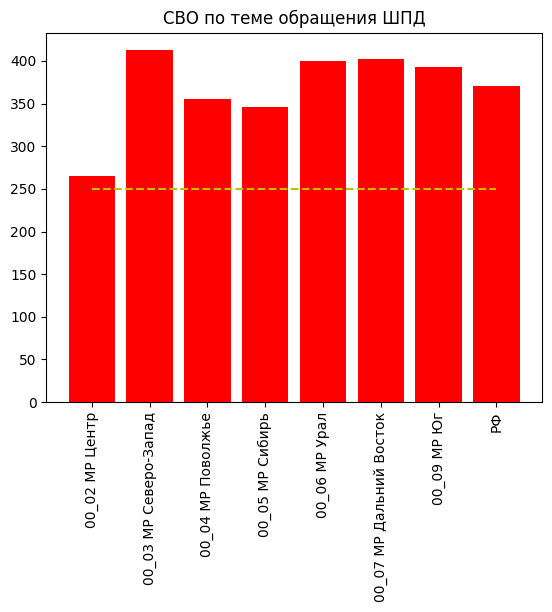

In [ ]:
#Диаграмма
df_visual = df_concat[df_concat['Тема'] == filter[0]]
y = df_visual['Среднее время'].to_list()
x = df_visual['МР сервис-провайдера'].to_list()
col = []
for i in y:
  if i > 250:
    col.append('r')
  else:
    col.append('b')

bars = plt.bar(x, y, label = 'МР сервис-провайдера', color = col)
plt.title(f'СВО по теме обращения {filter[0]}')
plt.plot(df_visual['МР сервис-провайдера'].to_list(), [250, 250, 250, 250, 250, 250, 250, 250], '--y')
plt.xticks(rotation=90)
plt.show()

In [ ]:
with pd.ExcelWriter('/content/Задания 1_3 для кандидата в ГУН_итог.xlsx', engine= 'openpyxl', mode = 'a') as writer:
  df_1_res.to_excel(writer, sheet_name= 'Задание_1_python')
  df_task2_format.to_excel(writer, sheet_name= 'Таблица 2_py')
  df_task2_format.to_excel(writer, sheet_name= 'Диаграмма_py')